# Libraries and Functions

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from random import seed
from random import randrange
import joblib

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
  z = 1/(1 + np.exp(-x))
  z = z * (1-z)
  return z

def checking_accuracy(y_test,y_pred):
  n=0
  j=0
  while (j<y_test.size): #test_accuracy
    if (y_pred[j] == y_test[j]):
      n+=1
    j+=1
  accu = n/j
  return accu

# Creating Training dataset

In [ ]:
X = np.full((169,2), -1, dtype=float)
l = 0
i = 0
while (i<6.5):
  j = 0
  k = 0
  while (j<6.5):
    X[l][k] = i
    k+=1
    X[l][k] = j
    k=0
    l+=1
    j += 0.5
  i += 0.5

In [ ]:
y = np.full((169), 0)
l=0
i=0
while (i<6.5):
  j=0
  while (j<6.5):
    if (j>=2 and j<=4):
      y[l] = 1
    if (i>=2 and i<=4):
      y[l] = 1
    l+=1
    j += 0.5
  i += 0.5

In [ ]:
y1 = np.full((169), 0)
l=0
i=0
while (i<6.5):
  j=0
  while (j<6.5):
    if (i>1.5 and i<4.5 and j<4.5 and j>1.5):
      y1[l] = 0
    elif (j>=2 and j<=4):
      y1[l] = 1
    elif (i>=2 and i<=4):
      y1[l] = 1
    l+=1
    j += 0.5
  i += 0.5

In [ ]:
dataset = pd.DataFrame(X, columns=['X1', 'X2'])
dataset['label'] = y
dataset = dataset.sample(frac=1, random_state=0)
data = dataset.iloc[:].values

In [ ]:
dataset1 = pd.DataFrame(X, columns=['X1', 'X2'])
dataset1['label'] = y1
dataset1 = dataset1.sample(frac=1, random_state=0)
data1 = dataset1.iloc[:].values

## Plotting the shapes as given

In [ ]:
def plotting_shapes(X, y, y1):
  df = pd.DataFrame()
  df['x_axis'] = X[:,0]
  df['y_axis'] = X[:,1]
  df['labels'] = y
  df['labels1'] = y1
  sn.lmplot(data=df, x='x_axis', y='y_axis', hue='labels',
                    fit_reg=False, legend=True, legend_out=True)
  plt.title('Plot-1', size=16)
  plt.xlabel('X1', size=12)
  plt.ylabel('X2', size=12)
  sn.lmplot(data=df, x='x_axis', y='y_axis', hue='labels1',
                    fit_reg=False, legend=True, legend_out=True)
  plt.title('Plot-2', size=16)
  plt.xlabel('X1', size=12)
  plt.ylabel('X2', size=12)

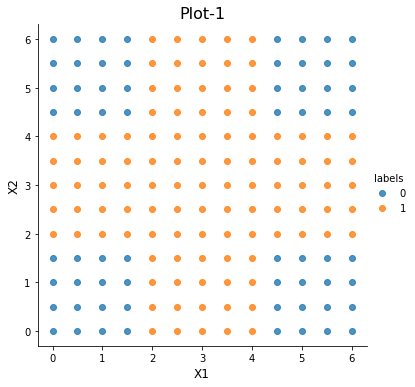

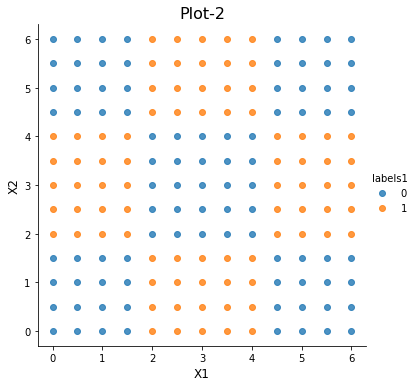

In [ ]:
plotting_shapes(X, y, y1)

# **Medaline Learning Network for  *f1(x1, x2)***
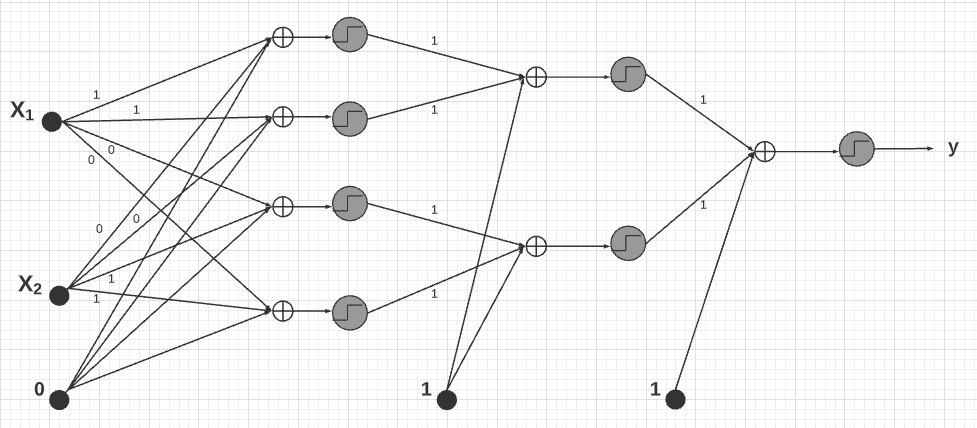

In [ ]:
class Layer1:
  def __init__(self, input1, input2):
    self.input1 = input1
    self.input2 = input2

  def neuron1(self, w1=1, w2=1, bias=0):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=2:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron2(self, w1=1, w2=1, bias=0):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]<=4:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron3(self, w1=1, w2=1, bias=0):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=2:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron4(self, w1=1, w2=1, bias=0):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]<=4:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

In [ ]:
class Layer2:
  def __init__(self, input1, input2, input3, input4):
    self.input1 = input1
    self.input2 = input2
    self.input3 = input3
    self.input4 = input4

  def neuron1(self, w1=1, w2=1, bias=1):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=3:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron2(self, w1=1, w2=1, bias=1):
    activation = (self.input3 * w1) + (self.input4 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=3:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

# **Using *f1(x1, x2)* and adding one layer of 2 neurons to create *f2(x1, x2)***
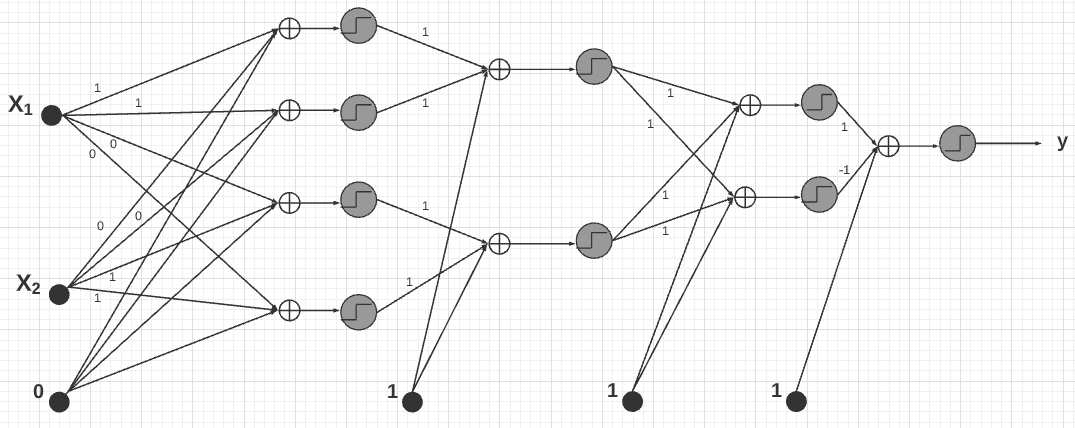

In [ ]:
class Layer3: # for f2(x1, x2)
  def __init__(self, input1, input2):
    self.input1 = input1
    self.input2 = input2

  def neuron1(self, w1=1, w2=1, bias=1):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=2:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron2(self, w1=1, w2=1, bias=1):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=3:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

In [ ]:
class OutputLayer:
  def __init__(self, input1, input2):
    self.input1 = input1
    self.input2 = input2

  def neuron1_b(self, w1=1, w2=-1, bias=1):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=2:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

  def neuron1_a(self, w1=1, w2=1, bias=1):
    activation = (self.input1 * w1) + (self.input2 * w2) + bias  #Hard Threshold
    # print(activation)
    for i in range(activation.size):
      if activation[i]>=2:
        activation[i] = 1
      else:
        activation[i] = 0
    return activation

In [ ]:
class Medaline(Layer1, Layer2, Layer3, OutputLayer):
  def __init__(self, input, y):
    self.input = input
    self.input1 = input[:,0]
    self.input2 = input[:,1]
    self.lr = 0.000962
    self.threshold = 0.86
    self.y = y.reshape(y.size, 1)
    self.wts1 = np.full((2, 4), 1.0)
    self.wts2 = np.full((2, 2), 1)
    self.wts3 = np.full((2, 2), 1.0)
    self.wts3_a = np.full((1, 2), 1)
    self.wts4_b = np.full((1, 2), 1)

  def layer_1(self):
    obj = Layer1(self.input1, self.input2)
    # print(self.wts1)
    self.out11 = obj.neuron1(self.wts1[0][0],self.wts1[1][0])
    self.out12 = obj.neuron2(self.wts1[0][1],self.wts1[1][1])
    self.out13 = obj.neuron3(self.wts1[0][2],self.wts1[1][2])
    self.out14 = obj.neuron4(self.wts1[0][3],self.wts1[1][3])
    # layer1 = pd.DataFrame()
    # layer1['n1'] = self.out11
    # layer1['n2'] = self.out12
    # layer1['n3'] = self.out13
    # layer1['n4'] = self.out14
    # print(1)
    # self.layer1 = layer1.iloc[:,:].values
    # self.layer1 = np.concatenate(np.concatenate(np.concatenate(self.out11, self.out12), self.out13), self.out14)
    # print(self.layer1.shape)
  
  def layer2(self):
    obj = Layer2(self.out11, self.out12, self.out13, self.out14)
    self.out21 = obj.neuron1(self.wts2[0][0], self.wts2[1][0])
    self.out22 = obj.neuron2(self.wts2[0][1], self.wts2[1][1])

  def layer3(self):
    obj = Layer3(self.out21, self.out22)
    self.out31 = obj.neuron1(self.wts3[0][0], self.wts3[1][0])
    self.out32 = obj.neuron2(self.wts3[0][1], self.wts3[1][1])

  def weightUpdates(self, output):
    output = output.reshape(self.y.shape)
    error = np.dot((self.y - output).T, self.input) * self.lr
    error[0][0] = np.round(error[0][0], decimals=2)
    # min = 1e5
    # wts_1 = np.full(self.wts1.shape, 1.0)
    # print(error[0][0])
    for j in range(2):
      for i in range(4):
        self.wts1[1][j] -= error[0][0]
        # self.wts1[1][0] = np.round(self.wts1[1][0], decimals=1)
        output = self.predict_a(self.input)
        output = output.reshape(self.y.shape)
        error = np.dot((self.y - output).T, self.input) * self.lr
        error[0][0] = np.round(error[0][0], decimals=2)
        if (self.wts1[1][j] < self.threshold):
        #   min = error[0][0]
          self.wts1[1][j] = 0
          break
        # print(self.wts1[1][j], error[0][0])
    error = np.dot((self.y - output).T, self.input) * self.lr
    error[0][0] = np.round(error[0][0], decimals=2)
    for j in range(2):
      for i in range(5):
        self.wts1[0][j+2] -= error[0][0]
        # self.wts1[1][0] = np.round(self.wts1[1][0], decimals=1)
        output = self.predict_a(self.input)
        output = output.reshape(self.y.shape)
        error = np.dot((self.y - output).T, self.input) * self.lr
        error[0][0] = np.round(error[0][0], decimals=2)
        if (self.wts1[0][j+2] < self.threshold):
        #   min = error[0][0]
          self.wts1[0][j+2] = 0
          break
        # print(self.wts1[0][j+2], error[0][0])
    # self.wts1 = wts_1
    output = self.predict_a(self.input)
    return output
    # print(loss.shape, self.y.shape, self.output.shape)
    # d_wts3 = np.dot(self.layer2.T, loss)
    # print(self.wts3.T.shape)
    # d_wts2 = np.dot(self.layer1.T,  (np.dot(loss, self.wts3.T) * sigmoid_derivative(self.layer2)))
    # print(self.input.T.shape, loss.shape, self.wts2.T.shape, sigmoid_derivative(self.layer1).shape, 'Target->', self.wts1.shape)
    # d_wts1 = np.dot(self.input.T,  (np.dot(np.dot(loss, self.wts3.T), self.wts2.T) * sigmoid_derivative(self.layer1)))
    # self.wts1 += d_wts1
    # self.wts2 += d_wts2
    # self.wts3 += d_wts3

  def weightUpdates_b(self, output):
    output = output.reshape(self.y.shape)
    error = np.dot((self.y - output).T, self.input) * self.lr
    error[0][0] = np.round(error[0][0], decimals=2)
    for i in range(4):
      self.wts4_b[0][1] += error[0][0]
      output = self.predict_a(self.input)
      output = output.reshape(self.y.shape)
      error = np.dot((self.y - output).T, self.input) * self.lr
      error[0][0] = np.round(error[0][0], decimals=2)
      if (self.wts4_b[0][1] < self.threshold):
        self.wts4_b[0][1] = -1
        break
      print(self.wts4_b[0][1], error[0][0])
    output = self.predict_a(self.input)
    return output

  def outputLayer_a(self):
    obj = OutputLayer(self.out21, self.out22)
    self.output_a = obj.neuron1_a(self.wts3_a[0][0], self.wts3_a[0][1])
  
  def outputLayer_b(self):
    obj = OutputLayer(self.out31, self.out32)
    self.output_b = obj.neuron1_b(self.wts4_b[0][0], self.wts4_b[0][1])

  def fit_a(self, epochs=20):
    for i in range(epochs):
      # print(self.wts1)
      self.layer_1()
      self.layer2()
      self.outputLayer_a()
      self.output_a = self.weightUpdates(self.output_a)

      # self.backProp()
      return self.output_a
    # print(self.output)
  
  def fit_b(self, epochs=20):
    for i in range(epochs):
      # print(self.wts1)
      self.layer_1()
      self.layer2()
      self.layer3()
      self.outputLayer_b()
      self.output_b = self.weightUpdates(self.output_b)
      self.output_b = self.weightUpdates_b(self.output_b)
      self.output_b = self.predict_b(self.input)
      return self.output_b
  
  def predict_a(self, X):
    X = np.array(X)
    obj = Layer1(X[:,0], X[:,1])
    # print(self.wts1)
    out11 = obj.neuron1(self.wts1[0][0],self.wts1[1][0])
    out12 = obj.neuron2(self.wts1[0][1],self.wts1[1][1])
    out13 = obj.neuron3(self.wts1[0][2],self.wts1[1][2])
    out14 = obj.neuron4(self.wts1[0][3],self.wts1[1][3])

    obj = Layer2(out11, out12, out13, out14)
    out21 = obj.neuron1(self.wts2[0][0], self.wts2[1][0])
    out22 = obj.neuron2(self.wts2[0][1], self.wts2[1][1])

    obj = OutputLayer(out21, out22)
    output = obj.neuron1_a(self.wts3_a[0][0], self.wts3_a[0][1])

    # output = self.weightUpdates()
    
    return output.astype('int')

  def predict_b(self, X):
    X = np.array(X)
    obj = Layer1(X[:,0], X[:,1])
    # print(self.wts1)
    out11 = obj.neuron1(self.wts1[0][0],self.wts1[1][0])
    out12 = obj.neuron2(self.wts1[0][1],self.wts1[1][1])
    out13 = obj.neuron3(self.wts1[0][2],self.wts1[1][2])
    out14 = obj.neuron4(self.wts1[0][3],self.wts1[1][3])

    obj = Layer2(out11, out12, out13, out14)
    out21 = obj.neuron1(self.wts2[0][0], self.wts2[1][0])
    out22 = obj.neuron2(self.wts2[0][1], self.wts2[1][1])

    obj = Layer3(out21, out22)
    out31 = obj.neuron1(self.wts3[0][0], self.wts3[1][0])
    out32 = obj.neuron2(self.wts3[0][1], self.wts3[1][1])

    obj = OutputLayer(out31, out32)
    output = obj.neuron1_b(self.wts4_b[0][0], self.wts4_b[0][1])

    return output.astype('int')

In [ ]:
X = data[:,:-1]
y = data[:,-1]
obj1 = Medaline(X, y)
y_pred = obj1.fit_a()
print("Accuracy: {0:.2f}%".format(checking_accuracy(y, y_pred)*100))

Accuracy: 100.00%


In [ ]:
# joblib.dump(obj1, '/content/drive/MyDrive/DL/Assignment-1/Q2_Model1')
obj1 = joblib.load('/content/drive/MyDrive/DL/Assignment-1/Q2_Model1')

In [ ]:
obj1.predict_a([[3, 3.5]])

array([1])

In [ ]:
X = data1[:,:-1]
y = data1[:,-1]
obj2 = Medaline(X, y)
y_pred1 = obj2.fit_b()
print("Accuracy: {0:.2f}%".format(checking_accuracy(y, y_pred1)*100))

Accuracy: 100.00%


In [ ]:
# joblib.dump(obj2, '/content/drive/MyDrive/DL/Assignment-1/Q2_Model2')
obj2 = joblib.load('/content/drive/MyDrive/DL/Assignment-1/Q2_Model2')

In [ ]:
obj2.predict_b([[4, 3.5]])

array([0])

## Plotting the predicted shapes on Train and Test Datasets

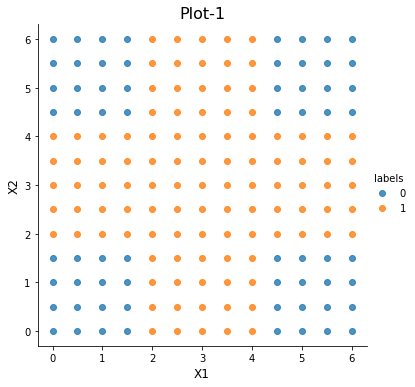

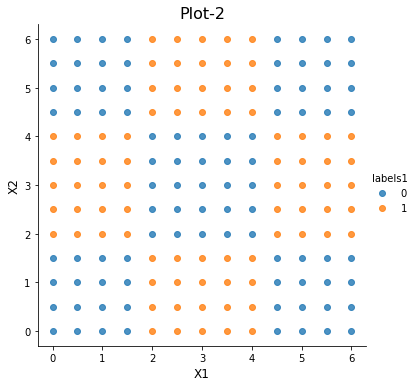

In [ ]:
plotting_shapes(X, y_pred, y_pred1)

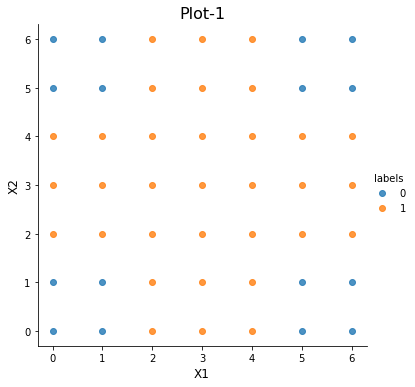

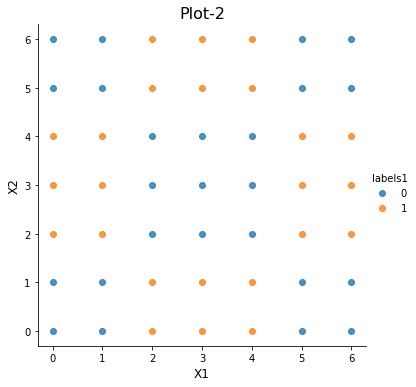

In [ ]:
x_test = np.full((49,2), -1, dtype=float)
l = 0
i = 0
while (i<6.5):
  j = 0
  k = 0
  while (j<6.5):
    x_test[l][k] = i
    k+=1
    x_test[l][k] = j
    k=0
    l+=1
    j += 1
  i += 1

y_test = obj1.predict_a(x_test)
y_test1 = obj2.predict_b(x_test)
plotting_shapes(np.array(x_test), y_test, y_test1)

# Extras

In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4)
        self.weights2   = np.random.rand(self.weights1.shape[1],2) 
        self.weights3   = np.random.rand(2,1)                 
        self.y          = y.reshape(y.size, 1)
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        self.output = sigmoid(np.dot(self.layer2, self.weights3))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        loss = (2*(self.y - self.output) * sigmoid_derivative(self.output))
        # print(loss.shape, self.y.shape, self.output.shape)
        d_weights3 = np.dot(self.layer2.T, loss)
        # print(self.weights3.T.shape)
        d_weights2 = np.dot(self.layer1.T,  (np.dot(loss, self.weights3.T) * sigmoid_derivative(self.layer2)))
        # print(self.input.T.shape, loss.shape, self.weights2.T.shape, sigmoid_derivative(self.layer1).shape, 'Target->', self.weights1.shape)
        d_weights1 = np.dot(self.input.T,  (np.dot(np.dot(loss, self.weights3.T), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.weights3 += d_weights3
        # print(self.weights1, self.weights2, self.weights3)

    def fit(self, epochs=20):
      for i in range(epochs):
        self.feedforward()
        self.backprop()
      return self.output

In [ ]:
# for j in range(101):
#   obj = NeuralNetwork(data[:,:-1], data[:,-1])
#   y_pred = obj.fit(j)
#   for i in range(y_pred.size):
#     if (y_pred[i] >= 0.5):
#       y_pred[i] = 1
#     else:
#       y_pred[i] = 0
#   print(checking_accuracy(data[:,-1], y_pred), j)

In [ ]:
obj = NeuralNetwork(data[:,:-1], data[:,-1])
y_pred = obj.fit(40)
for i in range(y_pred.size):
  if (y_pred[i] >= 0.5):
    y_pred[i] = 1
  else:
    y_pred[i] = 0
print(checking_accuracy(data[:,-1], y_pred))

0.621301775147929


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [ ]:
# Load a CSV file
# def load_csv(filename):
# 	dataset = list()
# 	with open(filename, 'r') as file:
# 		csv_reader = reader(file)
# 		for row in csv_reader:
# 			if not row:
# 				continue
# 			dataset.append(row)
# 	return dataset

# Convert string column to float
# def str_column_to_float(dataset, column):
# 	for row in dataset:
# 		row[column] = float(row[column].strip())

# Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup

# Split a dataset into k folds
# def cross_validation_split(dataset, n_folds):
#     dataset_split = list()
#     dataset_copy = list(dataset)
#     fold_size = int(len(dataset) / n_folds)
#     for i in range(n_folds):
#       fold = list()
#       # print(dataset_copy)
#       while len(fold) < fold_size:
#         index = randrange(len(dataset_copy))
#         # print(1)
#         fold.append(dataset_copy.pop(index))
#       dataset_split.append(fold)
#     return dataset_split

# Calculate accuracy percentage
# def checking_accuracy(actual, predicted):
# 	correct = 0
# 	for i in range(len(actual)):
# 		if actual[i] == predicted[i]:
# 			correct += 1
# 	return correct / float(len(actual)) * 100.0

# # Evaluate an algorithm using a cross validation split
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
#     folds = cross_validation_split(dataset, n_folds)
#     scores = list()
#     for fold in folds:
#       train_set = list(folds)
#       # print(len(train_set))
#       # print(fold)
#       # train_set.remove(fold)
#       train_set = sum(train_set, [])
#       test_set = list()
#       for row in fold:
#         row_copy = list(row)
#         test_set.append(row_copy)
#         row_copy[-1] = None
#       predicted = algorithm(train_set, test_set, *args)
#       actual = [row[-1] for row in fold]
#       accuracy = checking_accuracy(actual, predicted)
#       scores.append(accuracy)
#     return scores

# # Make a prediction with weights
# def predict(row, weights):
# 	activation = weights[0]
# 	for i in range(len(row)-1):
# 		activation += weights[i + 1] * row[i]
# 	return 1.0 if activation >= 0.0 else 0.0

# # Estimate Perceptron weights using stochastic gradient descent
# def train_weights(train, l_rate, n_epoch):
# 	weights = [0.0 for i in range(len(train[0]))]
# 	for epoch in range(n_epoch):
# 		for row in train:
# 			prediction = predict(row, weights)
# 			error = row[-1] - prediction
# 			weights[0] = weights[0] + l_rate * error
# 			for i in range(len(row)-1):
# 				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
# 	return weights

# # Perceptron Algorithm With Stochastic Gradient Descent
# def perceptron(train, test, l_rate, n_epoch):
# 	predictions = list()
# 	weights = train_weights(train, l_rate, n_epoch)
# 	for row in test:
# 		prediction = predict(row, weights)
# 		predictions.append(prediction)
# 	return(predictions)

# Test the Perceptron algorithm on the sonar dataset
# seed(1)
# load and prepare data
# filename = 'sonar.all-data.csv'
# dataset = load_csv(filename)
# for i in range(len(dataset[0])-1):
# 	str_column_to_float(dataset, i)
# # convert string class to integers
# str_column_to_int(dataset, len(dataset[0])-1)
# # evaluate algorithm
# n_folds = 3
# l_rate = 0.01
# n_epoch = 500
# scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

In [ ]:
# scores = evaluate_algorithm(data, perceptron, 5, 0.01, 50)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))